In [1]:
%matplotlib inline
%load_ext dotenv
%dotenv env.sh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path as osp
from skimage import img_as_float
from cytokit import io as ck_io
from cytokit.function import data as ck_data
from cytokit import config as ck_config
from cytokit.function import data as ck_data
from cytokit.ops import tile_generator, cytometry
plt.gray()
None

<Figure size 432x288 with 0 Axes>

In [2]:
#exp_name, variant, tx, ty, tz = '02.5mT-np-0uMsta-XY01', 'v00', 2, 0, 'best'
#exp_name, variant, tx, ty, tz = '02.5mT-np-0uMsta-XY01', 'v00', 1, 0, 'best'
exp_name, variant, tx, ty, tz = '02.5mT-np-0uMsta-XY01', 'v00', 2, 1, 6

In [3]:
output_dir = osp.join(os.environ['EXP_GROUP_OUT_DIR'], exp_name, variant)
config = ck_config.load(osp.join(output_dir, 'config'))

In [4]:
config._conf['processor']['cytometry']['target_shape'] = [1008, 1344]

In [5]:
#config._conf['processor']['cytometry']['segmentation_params'] = {'marker_min_size': 8}

In [6]:
tile, meta = ck_io.read_tile(osp.join(output_dir, ck_io.get_processor_img_path(0, tx=tx, ty=ty)), return_metadata=True)
tile.shape, tile.dtype

((1, 9, 4, 504, 672), dtype('uint16'))

In [7]:
meta['structured_labels'][0][0]

array(['SYTOX', 'ICYTE', 'HOECHST', 'BF'], dtype='<U7')

In [8]:
if tz == 'best':
    z = ck_data.get_best_focus_data(output_dir).set_index(['region_index', 'tile_x', 'tile_y']).loc[(0, tx, ty)]['best_z']
else:
    z = int(tz)
z

6

In [9]:
op = cytometry.Cytometry2D(config, z_plane='best').initialize()

Using TensorFlow backend.


In [10]:
op.target_shape

[1008, 1344]

In [11]:
_, (img_seg, stats) = op.run(tile, best_focus_z_plane=z)

In [12]:
img_seg.shape

(1, 9, 4, 504, 672)

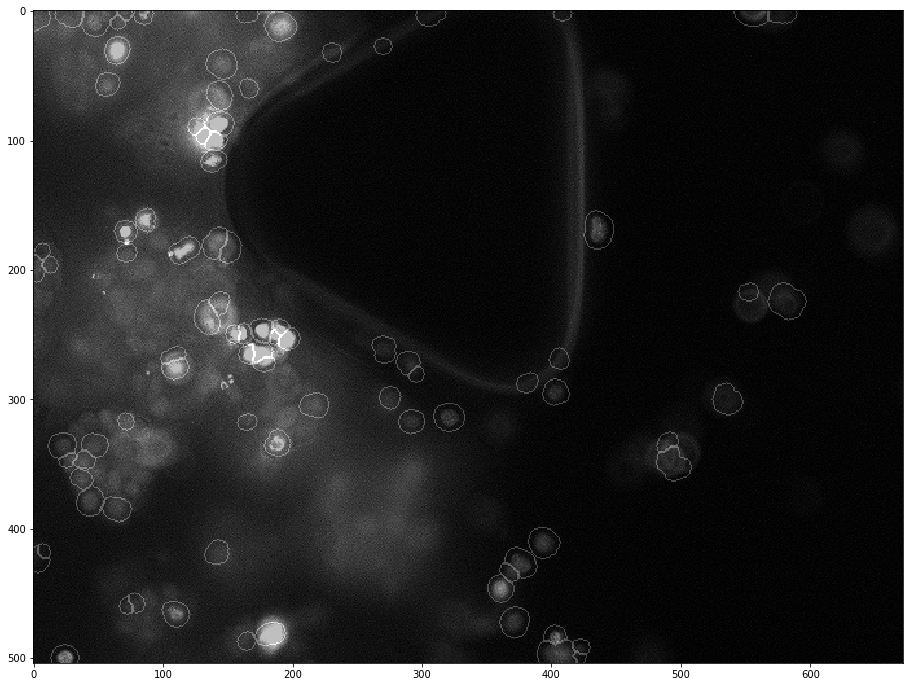

In [13]:
# 02.5mT-np-0uMsta-XY01 (Z6) - X3Y2 - W/ upscaling
plt.imshow(
    img_as_float(tile[0, z, config.get_channel_coordinates('HOECHST')[1]]).clip(0, .3)
    + .1*img_seg[0, z, 2].clip(0, 1).astype(np.float32)
)
plt.gcf().set_size_inches(16, 12)

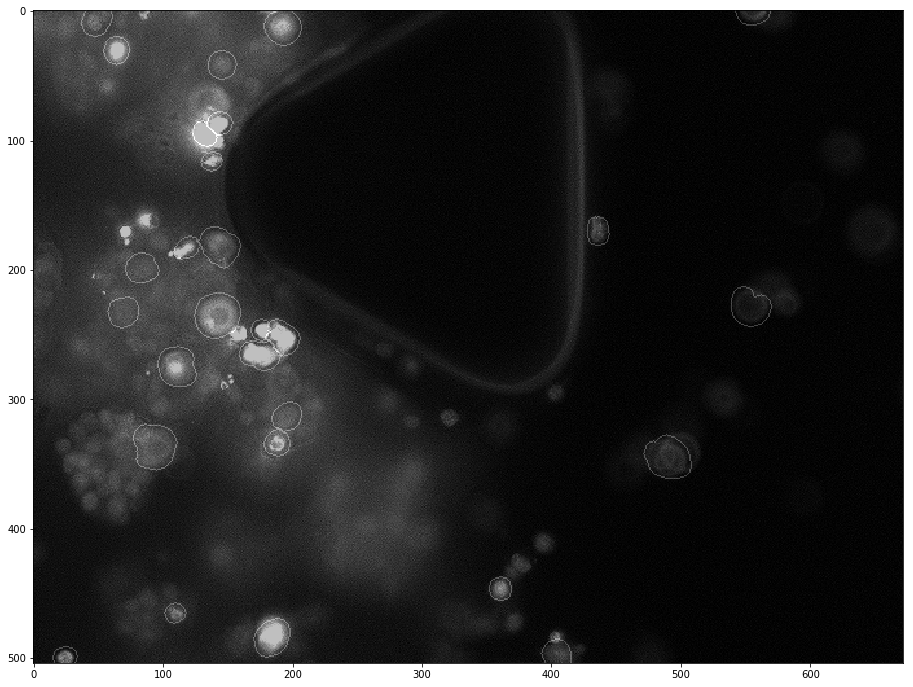

In [12]:
# 02.5mT-np-0uMsta-XY01 (Z6) - X3Y2 - No upscaling
plt.imshow(
    img_as_float(tile[0, z, config.get_channel_coordinates('HOECHST')[1]]).clip(0, .3)
    + .1*img_seg[0, z, 2].clip(0, 1).astype(np.float32)
)
plt.gcf().set_size_inches(16, 12)

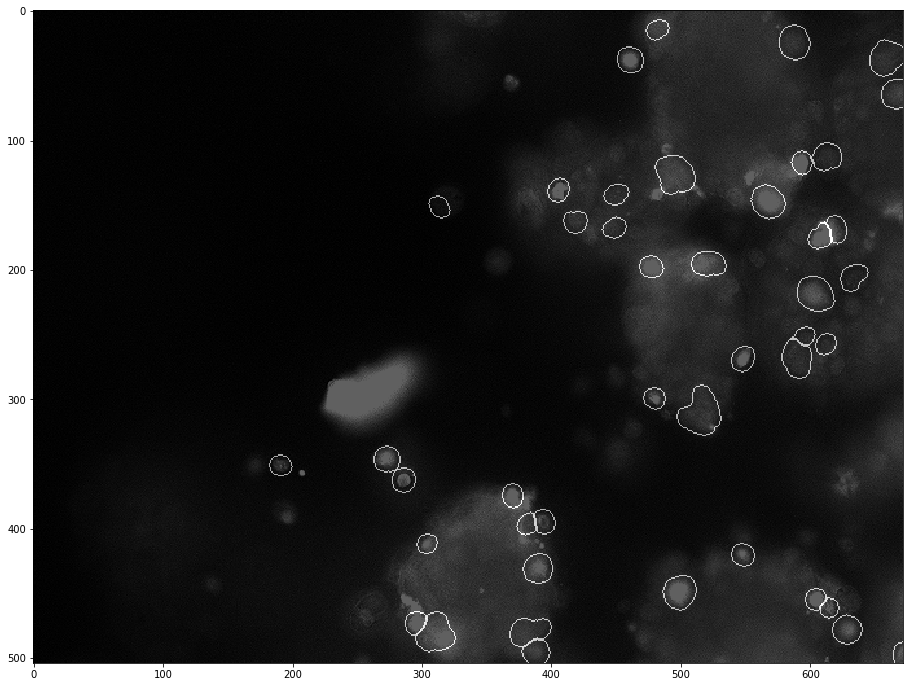

In [13]:
# 02.5mT-np-0uMsta-XY01 - X2Y1 - No upscaling
plt.imshow(
    img_as_float(tile[0, z, config.get_channel_coordinates('HOECHST')[1]]).clip(0, .3)
    + .5*img_seg[0, z, 2].clip(0, 1).astype(np.float32)
)
plt.gcf().set_size_inches(16, 12)

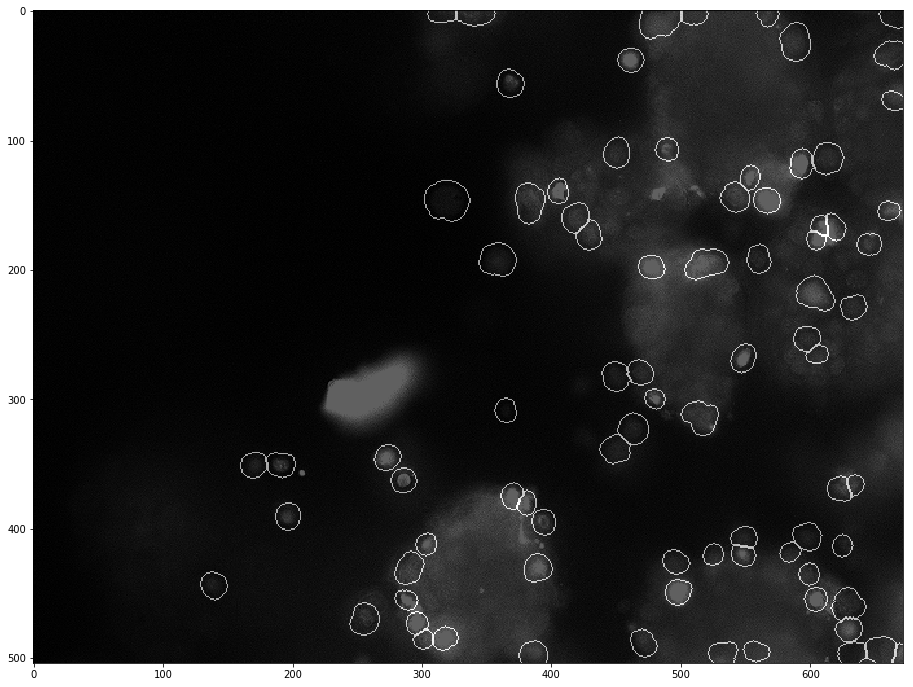

In [26]:
# 02.5mT-np-0uMsta-XY01 - X2Y1 - W/ upscaling
plt.imshow(
    img_as_float(tile[0, z, config.get_channel_coordinates('HOECHST')[1]]).clip(0, .3)
    + .5*img_seg[0, z, 2].clip(0, 1).astype(np.float32)
)
plt.gcf().set_size_inches(16, 12)

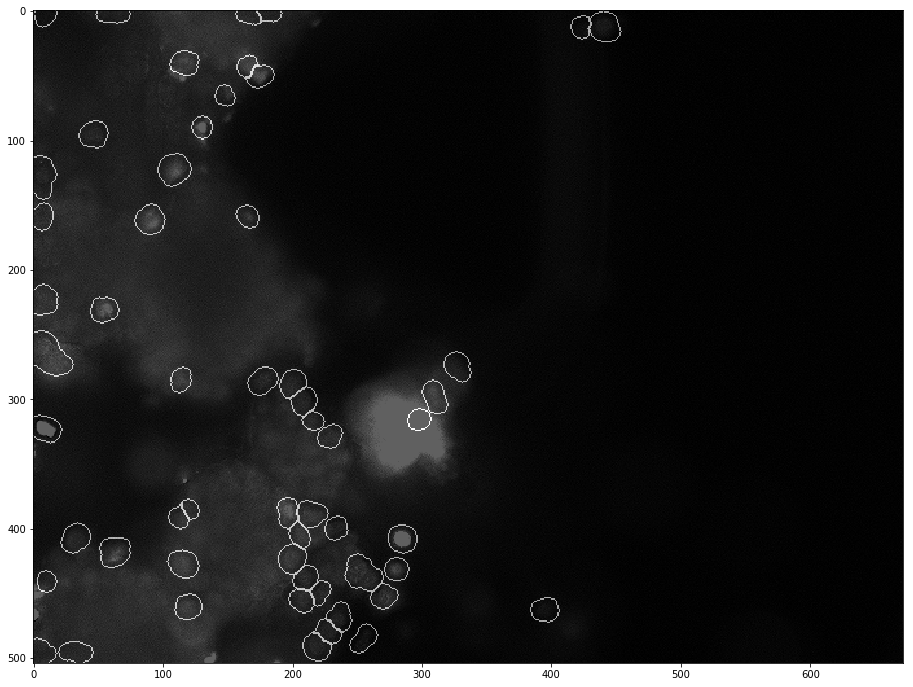

In [16]:
# 02.5mT-np-0uMsta-XY01 - X3Y1 - W/ upscaling
plt.imshow(
    img_as_float(tile[0, z, config.get_channel_coordinates('HOECHST')[1]]).clip(0, .3)
    + .5*img_seg[0, z, 2].clip(0, 1).astype(np.float32)
)
plt.gcf().set_size_inches(16, 12)

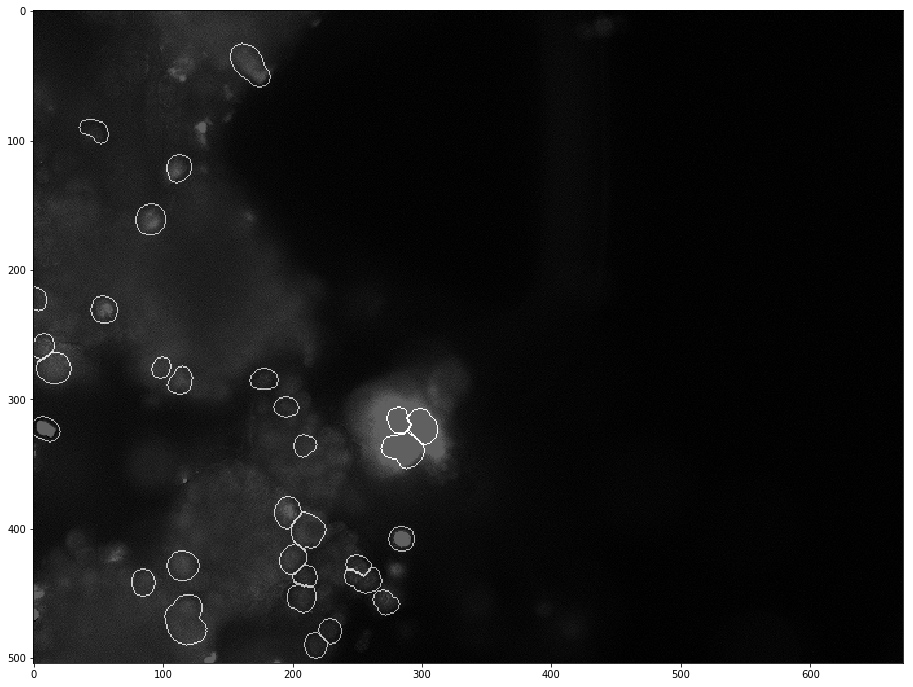

In [82]:
# 02.5mT-np-0uMsta-XY01 - X3Y1 - No upscaling
plt.imshow(
    img_as_float(tile[0, z, config.get_channel_coordinates('HOECHST')[1]]).clip(0, .3)
    + .5*img_seg[0, z, 2].clip(0, 1).astype(np.float32)
)
plt.gcf().set_size_inches(16, 12)